Nama : Andrew

NIM : 2540119601

Kelas : LA09

Mata Kuliah : Deep Learning

Jurusan : Data Science

Link Video : https://www.youtube.com/watch?v=HulYcu6RbYs

###### Import Dataset

In [ ]:
# libary
import pandas as pd

Data diambil melalui drive

In [ ]:
# connect to drive to easily get data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Parse colomn date sehingga sesuai dengan format date dan juga membuat kolom date menjadi index, karena time series data

In [ ]:
# specify to make date as a index
df1 = pd.read_csv('/content/drive/MyDrive/UAS_deepLearning_data/Dataset C/GOOGL.csv',parse_dates=["Date"],index_col=["Date"])
df2 = pd.read_csv('/content/drive/MyDrive/UAS_deepLearning_data/Dataset C/INTC.csv',parse_dates=["Date"],index_col=["Date"])

In [ ]:
print(df1)
print(df2)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    50.050049    52.082081    48.028027    50.220219    50.220219   
2004-08-20    50.555557    54.594593    50.300301    54.209209    54.209209   
2004-08-23    55.430431    56.796795    54.579578    54.754753    54.754753   
2004-08-24    55.675674    55.855854    51.836838    52.487488    52.487488   
2004-08-25    52.532532    54.054054    51.991993    53.053055    53.053055   
...                 ...          ...          ...          ...          ...   
2020-03-26  1114.719971  1171.479980  1092.030029  1162.920044  1162.920044   
2020-03-27  1127.469971  1151.050049  1104.000000  1110.260010  1110.260010   
2020-03-30  1132.640015  1151.000000  1098.489990  1146.310059  1146.310059   
2020-03-31  1148.729980  1173.400024  1136.719971  1161.949951  1161.949951   
2020-04-01  1124.000000  1129.420044  1093.489990  1

Pada soal yang dipakai hanya kolom close untuk kedua data, sehingga dapat membuat dataframe baru yang berisikan colomn close.

In [ ]:
# takes only index and close on each day
google = pd.DataFrame(df1["Close"])
intc = pd.DataFrame(df2["Close"])
print(google.head())
print(intc.head())

                Close
Date                 
2004-08-19  50.220219
2004-08-20  54.209209
2004-08-23  54.754753
2004-08-24  52.487488
2004-08-25  53.053055
               Close
Date                
1980-03-17  0.325521
1980-03-18  0.322917
1980-03-19  0.330729
1980-03-20  0.329427
1980-03-21  0.317708


Data b ase telah terbentuk dengan berisikan kolom close dan index date

> With this we can proceeed to the next step, which is LSTM preprocessing

###### [LO 3, LO 4, 10 poin] Lakukan praproses data dengan memisahkan data time series tersebut menjadi dua bagian input dan output dengan window size = 5 [dari hari senin s.d jumat] dan horizon = 5 [dari hari senin s.d jumat]. Kemudian pisahkan dataset menjadi 80% training set, 10% validation set dan 10% test set.

In [ ]:
# Library
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(google.head(20))
print()
print(intc.head(20))

                Close
Date                 
2004-08-19  50.220219
2004-08-20  54.209209
2004-08-23  54.754753
2004-08-24  52.487488
2004-08-25  53.053055
2004-08-26  54.009010
2004-08-27  53.128128
2004-08-30  51.056057
2004-08-31  51.236237
2004-09-01  50.175175
2004-09-02  50.805805
2004-09-03  50.055054
2004-09-07  50.840839
2004-09-08  51.201202
2004-09-09  51.206207
2004-09-10  52.717716
2004-09-13  53.803802
2004-09-14  55.800800
2004-09-15  56.056057
2004-09-16  57.042042

               Close
Date                
1980-03-17  0.325521
1980-03-18  0.322917
1980-03-19  0.330729
1980-03-20  0.329427
1980-03-21  0.317708
1980-03-24  0.311198
1980-03-25  0.312500
1980-03-26  0.309896
1980-03-27  0.299479
1980-03-28  0.311198
1980-03-31  0.321615
1980-04-01  0.322917
1980-04-02  0.325521
1980-04-03  0.319010
1980-04-07  0.311198
1980-04-08  0.312500
1980-04-09  0.305990
1980-04-10  0.304688
1980-04-11  0.304688
1980-04-14  0.307292


Disini dapat dilihat terdapat beberapa hari libur dimana pada hari tersebut bursa saham tutup, selain itu juga setiap hari sabtu dan minggu bursa sama tutup.

In [ ]:
# Exploration data on each dataset
# Checking null value
google.info()
print()
intc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3932 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   10098 non-null  float64
dtypes: float64(1)
memory usage: 157.8 KB


Dari sini diketahui tidak ada null value yang dihasilkan dan terdapat 3932 data pada saham google dan 10098 data pada saham intc

disini data duplicated tidak cek, karena ada kemungkinan saham memiliki value yang sama pada saat close di hari yang berbeda dan juga untuk outlier tidak cek, karena ada kemungkinan di dalam data saham memiliki data yang melonjak tinggi pada hari-hari tertentu atau suatu event.

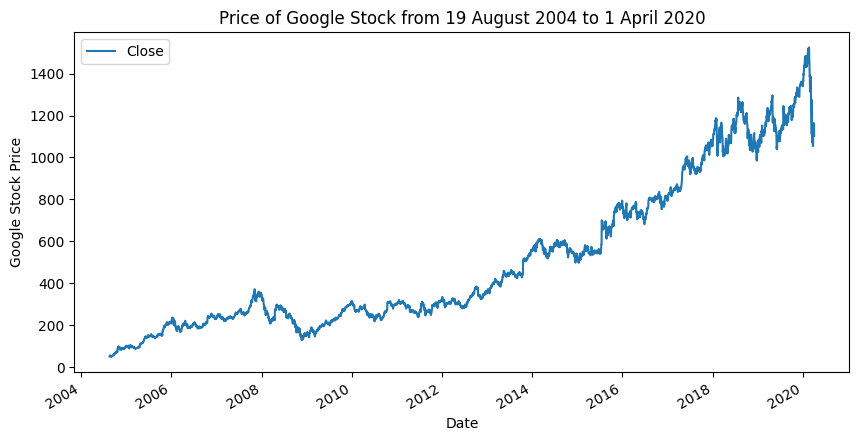

In [ ]:
# see the data in plot
google.plot(figsize=(10, 5))
plt.ylabel("Google Stock Price")
plt.title("Price of Google Stock from 19 August 2004 to 1 April 2020", fontsize=12)
plt.legend(fontsize=10);

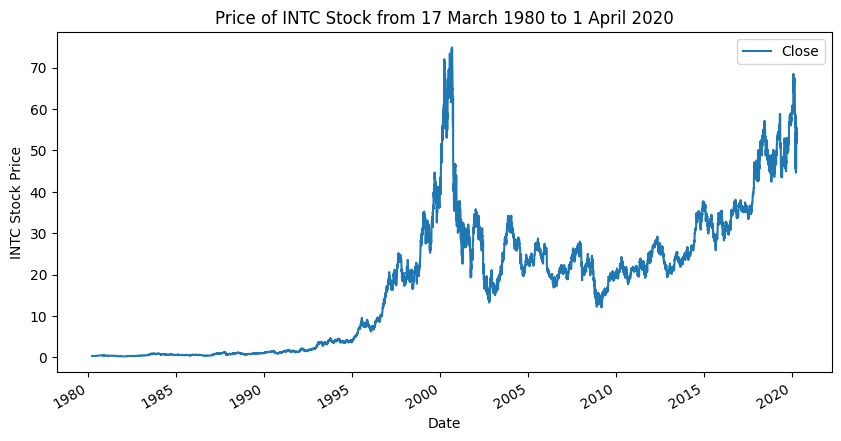

In [ ]:
# see the data in plot
intc.plot(figsize=(10, 5))
plt.ylabel("INTC Stock Price")
plt.title("Price of INTC Stock from 17 March 1980 to 1 April 2020", fontsize=12)
plt.legend(fontsize=10);

Dari kedau plot yang telah terbentuk kita mengetahui intel memiliki kenaikan harga close lebih kecil dibandingkan dengan google.

Selain itu intc memiliki data dari tahun 1980, sedangkan google memiliki data tahun 2004.

Untuk trend dari data sendiri dapat dilihat google meningkat setiap tahun, tetapi untuk saham intel megalami kenaikan tinggi disekitar tahun 200.

Before windowing changing make new variable of array to hold a value of the clossing price

In [ ]:
# to hold value of price
close_goo = google["Close"].to_numpy()
close_intc = intc["Close"].to_numpy()

print(close_goo)
print(close_intc)

[  50.22021866   54.20920944   54.75475311 ... 1146.31005859 1161.94995117
 1102.09997559]
[ 0.32552084  0.32291666  0.33072916 ... 55.49000168 54.11999893
 51.88000107]


Membuat function untuk pembuatan window dan horizon yang sekaligus melakukan splitting.

Window yang diminta adalah 5 dari senin hingga jumat dan horizon adalah 5 dari senin hingga jumat.

Define scaler untuk melakukan scalling

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
def window_data(df_close,scaling=False,train_size=0.8,check_value=False):

    training_data_len = math.ceil(len(df_close)* train_size)

    if scaling is True :
      data = scaler.fit_transform(df_close.values.reshape(-1, 1))
    else:
      data = df_close.values

    train_df = df_close.iloc[: training_data_len]
    train_data = data[:training_data_len]


    #Train set data
    # Define variable for train
    train_window = []
    train_horizon = []

    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday to friday (horizon)
    for i in range(len(train_df)):
      if train_df.index[i].weekday() == 0 and i+9 < len(train_df) and train_df.index[i + 5].weekday() == 0 and train_df.index[i + 9].weekday() == 4:
        train_window.append(train_data[i:i+5])
        train_horizon.append(train_data[i+5:i+10])

    #Determine where the start value of validation and test
    val_test_df = df_close.iloc[training_data_len: ]
    val_test_data = data[training_data_len: ]
    val_test_len = len(val_test_data)
    val_len = int(val_test_len * 0.5)
    test_len = val_test_len - val_len

    # Validation set data
    # Define variable for validation
    val_window = []
    val_horizon = []
    val_df =val_test_df.iloc[:val_len]
    val_data = val_test_data[:val_len]
    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday to friday (horizon)
    for i in range(len(val_df)):
      if val_df.index[i].weekday() == 0  and i+9 < len(val_df) and val_df.index[i + 5].weekday() == 0 and val_df.index[i +9].weekday() == 4:
        val_window.append(val_data[i:i+5])
        val_horizon.append(val_data[i+5:i+10])

    # Test set
    # Define variable for validation
    test_window = []
    test_horizon = []
    test_df = val_test_df.iloc[test_len:]
    test_data = val_test_data[test_len:]
    # using for loop with validate only accept closing when there is start from monday to friday(window)
    # Also have next following data of monday to friday (horizon)
    for i in range(len(test_df)):
      if test_df.index[i].weekday() == 0  and i+9 < len(test_df) and test_df.index[i + 5].weekday() == 0 and test_df.index[i + 9].weekday() == 4:
        test_window.append(test_data[i:i+5])
        test_horizon.append(test_data[i+5:i+10])

    # change the window data to array
    train_window = np.array(train_window)
    train_horizon = np.array(train_horizon)
    val_window = np.array(val_window)
    val_horizon = np.array(val_horizon)
    test_window = np.array(test_window)
    test_horizon = np.array(test_horizon)

    # Reshape the data so it can use in training data
    train_window = np.reshape(train_window, (train_window.shape[0], train_window.shape[1], 1))
    val_window = np.reshape(val_window, (val_window.shape[0], val_window.shape[1], 1))
    test_window = np.reshape(test_window, (test_window.shape[0], test_window.shape[1], 1))
    if check_value is True :
      print("Sample Window with horizon in training:")
      for i in range(5):
        print("window :",train_window[i].flatten(),"-> Horizon :",train_horizon[i].flatten())
    else:
      return train_window, train_horizon, val_window, val_horizon, test_window, test_horizon

Contoh dari window dan horizon yang akan terbentuk pada train set

In [ ]:
print("google")
window_data(google,check_value=True)
print()
print("intel")
window_data(intc,check_value=True)

google
Sample Window with horizon in training:
window : [54.75475311 52.48748779 53.05305481 54.00901031 53.12812805] -> Horizon : [51.05605698 51.23623657 50.17517471 50.80580521 50.05505371]
window : [53.80380249 55.80080032 56.05605698 57.04204178 58.80380249] -> Horizon : [59.73973846 58.9789772  59.2492485  60.47047043 59.97497559]
window : [59.73973846 58.9789772  59.2492485  60.47047043 59.97497559] -> Horizon : [59.18918991 63.49349213 65.60560608 64.86486816 66.35635376]
window : [59.18918991 63.49349213 65.60560608 64.86486816 66.35635376] -> Horizon : [67.59759521 69.2542572  68.60861206 69.49449158 68.93393707]
window : [67.59759521 69.2542572  68.60861206 69.49449158 68.93393707] -> Horizon : [67.6977005  68.76876831 70.52052307 71.07106781 72.1271286 ]

intel
Sample Window with horizon in training:
window : [0.32552084 0.32291666 0.33072916 0.32942709 0.31770834] -> Horizon : [0.31119791 0.3125     0.30989584 0.29947916 0.31119791]
window : [0.31119791 0.3125     0.305989

Splitting Data

In [ ]:
train_win_goo, train_lab_goo, val_win_goo, val_lab_goo, test_win_goo, test_lab_goo = window_data(google,scaling=True)
len(train_win_goo), len(train_lab_goo), len(val_win_goo), len(val_lab_goo), len(test_win_goo), len(test_lab_goo)

(437, 437, 55, 55, 52, 52)

In [ ]:
train_win_int, train_lab_int, val_win_int, val_lab_int, test_win_int, test_lab_int = window_data(intc,scaling=True)
len(train_win_int), len(train_lab_int), len(val_win_int), len(val_lab_int), len(test_win_int), len(test_lab_int)

(1156, 1156, 137, 137, 139, 139)

In [ ]:
test_win_int_check = scaler.inverse_transform(test_win_int[:,:,0])
test_win_goo_check = scaler.inverse_transform(test_win_goo[:,:,0])

Degan begitu kedua dataset telah siap untuk dimodelkan

###### [LO 3, LO 4, 10 poin] Buatlah arsitektur baseline sesuai dengan gambar arsitektur Transformer for Stocks berikut ini: (Catatan: bagian FEED FORWARD menggunakan satu layer Conv1D saja dengan Activation function menggunakan ReLU dan bagian node Perceptron pada output disesuaikan dengan horizon datanya)

In [ ]:
# library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

Fucntion untuk mengevaluasi model

In [ ]:
# function for evaluate model
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  return mae.numpy(),rmse.numpy(),mape.numpy()

Model tranfomers, sebelum masuk ke input. Model akan dimulai transformer block. Di dalam transformer block terdapat beberapa bagian. Multi head attention dan juga feed forward. Jika mengikuti model didalam soal. Selain itu terdapat juga add dan normalization setelah layernya.

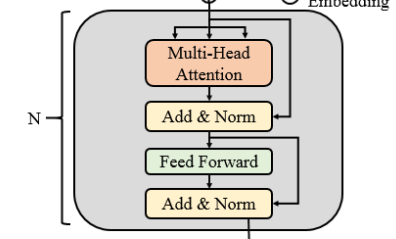

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):

    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    return x + res

Setelah bagian penting dibuat akan masuk ke bagian input ke ouput. Pada model akan terdapat feature embedding. Embedding digunakan untuk mengubah input mnejadi beberapa vektor yang mewakili si kategorinya. Selanjutnya akan ada positional embeding, dimana ini digunakan untuk menambahkan informasi lebih.

Lalu akan masuk ke tranformer block yang diloop sesuai keiinginan. Setelah itu baru ke output.

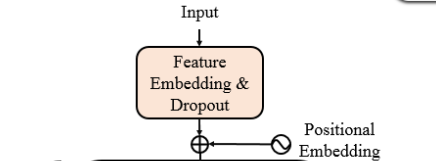
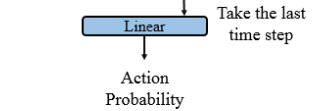

In [ ]:
def build_model(
    input_shape,
    embedding_dim,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = layers.Embedding(input_dim=10, output_dim=embedding_dim)(inputs)
    x = layers.Dropout(dropout)(x)
    position = tf.range(start=0, limit=5, delta=1)
    position_embedding = layers.Embedding(input_dim=5, output_dim=embedding_dim)(position)
    x = x + position_embedding

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(5, activation="linear")(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = train_win_goo.shape[1:]

Untuk menapung hasil MAE, RMSE, dan MAPE

In [ ]:
intel_model = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE'])
google_model = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE'])

In [ ]:
base_goo = build_model(
    input_shape,
    embedding_dim=32,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    dropout=0.15,
)

base_goo.compile(
    loss="mse",
    metrics=["mean_squared_error"],
)

base_goo.fit(
    train_win_goo,
    train_lab_goo,
    validation_data=(val_win_goo, val_lab_goo),
    epochs=20,
    batch_size=32
)

Epoch 1/20
14/14 [==============================] - 14s 83ms/step - loss: 439.4121 - mean_squared_error: 439.4121 - val_loss: 14.9374 - val_mean_squared_error: 14.9374
Epoch 2/20
14/14 [==============================] - 0s 34ms/step - loss: 10.6449 - mean_squared_error: 10.6449 - val_loss: 24.6729 - val_mean_squared_error: 24.6729
Epoch 3/20
14/14 [==============================] - 0s 33ms/step - loss: 13.1108 - mean_squared_error: 13.1108 - val_loss: 0.7548 - val_mean_squared_error: 0.7548
Epoch 4/20
14/14 [==============================] - 0s 34ms/step - loss: 3.9043 - mean_squared_error: 3.9043 - val_loss: 4.1138 - val_mean_squared_error: 4.1138
Epoch 5/20
14/14 [==============================] - 0s 34ms/step - loss: 0.8278 - mean_squared_error: 0.8278 - val_loss: 1.1921 - val_mean_squared_error: 1.1921
Epoch 6/20
14/14 [==============================] - 0s 35ms/step - loss: 96.5431 - mean_squared_error: 96.5431 - val_loss: 244.6326 - val_mean_squared_error: 244.6326
Epoch 7/20
14/1

In [ ]:
base_goo_pred = base_goo.predict(test_win_goo)
base_goo_pred_check = scaler.inverse_transform(base_goo_pred)

2/2 [==============================] - 0s 9ms/step


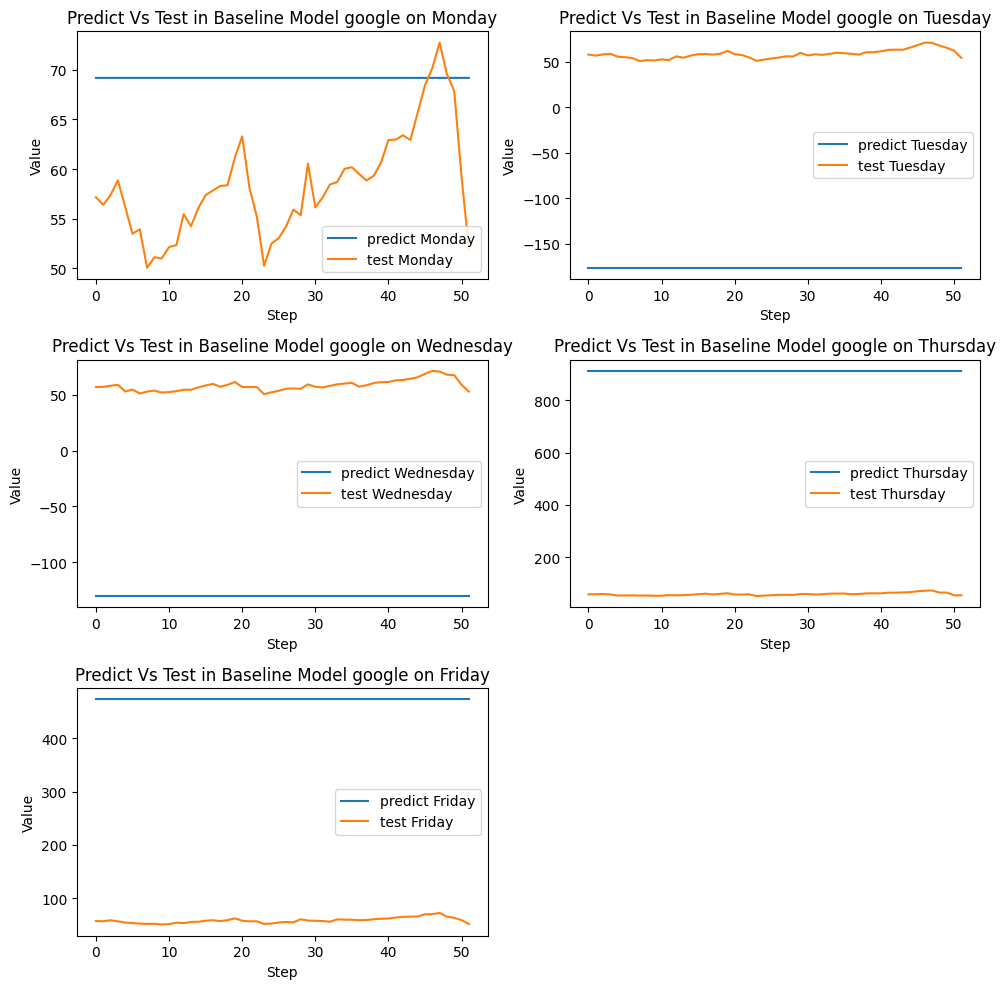

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


for i in range(5):
    ax = axs.flat[i]
    ax.plot(base_goo_pred_check[:,i], label=f'predict {days[i]}')
    ax.plot(test_win_goo_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Baseline Model google on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

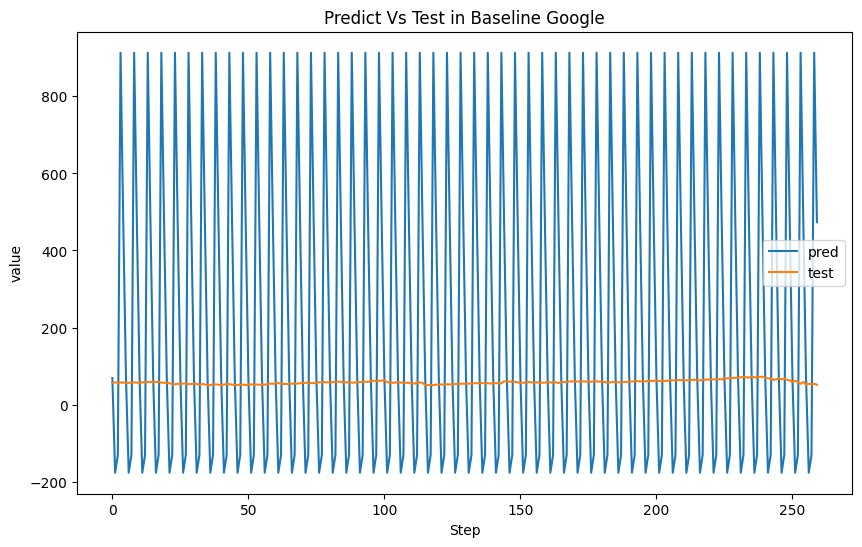

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(base_goo_pred_check.flatten(),label="pred")
plt.plot(test_win_goo_check.flatten(),label="test")
plt.title("Predict Vs Test in Baseline Google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

Dari sini dapat dilihat dengan menggunakan embedding di didalam univariate data memberikan hasil output yang konstan dan berulang. Sehingga dapat dikatakan modelnya tidak baik dan perlu diubah model.

In [ ]:
base_goo_results = evaluate_preds(y_true=test_lab_goo.flatten(), y_pred=base_goo_pred.flatten())
google_model.loc[0] = ["Base",base_goo_results[0],base_goo_results[1],base_goo_results[2]]
print("MAE :",base_goo_results[0])
print("RMSE :",base_goo_results[1])
print("MAPE :",base_goo_results[2])

MAE : 4.5667076
RMSE : 5.9719186
MAPE : 591.5103


untuk buktinya dari model yang tidak baik adalah pada plot dan hasil dari MAPE, MAE, RMSE. Dimana angka yang diciptakan sangatlah tinggi untuk baseline ini.

In [ ]:
base_int = build_model(
    input_shape,
    head_size=46,
    num_heads=60,
    embedding_dim=32,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
    dropout=0.15,
)

base_int.compile(
    loss="mean_squared_error",
    metrics=["mean_squared_error"],
)
#model.summary()


base_int.fit(
    train_win_int,
    train_lab_int,
    validation_data=(val_win_int, val_lab_int),
    epochs=20,
    batch_size=32
)

Epoch 1/20
37/37 [==============================] - 12s 43ms/step - loss: 157.3802 - mean_squared_error: 157.3802 - val_loss: 1.0638 - val_mean_squared_error: 1.0638
Epoch 2/20
37/37 [==============================] - 1s 30ms/step - loss: 3.0675 - mean_squared_error: 3.0675 - val_loss: 0.3894 - val_mean_squared_error: 0.3894
Epoch 3/20
37/37 [==============================] - 1s 31ms/step - loss: 49.4950 - mean_squared_error: 49.4950 - val_loss: 1.8308 - val_mean_squared_error: 1.8308
Epoch 4/20
37/37 [==============================] - 1s 31ms/step - loss: 317.1993 - mean_squared_error: 317.1993 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 5/20
37/37 [==============================] - 1s 33ms/step - loss: 2.4607 - mean_squared_error: 2.4607 - val_loss: 0.2920 - val_mean_squared_error: 0.2920
Epoch 6/20
37/37 [==============================] - 1s 34ms/step - loss: 2.4575 - mean_squared_error: 2.4575 - val_loss: 8.3145 - val_mean_squared_error: 8.3145
Epoch 7/20
37/37 [=====

In [ ]:
base_int_pred = base_int.predict(test_win_int)
base_int_pred_check = scaler.inverse_transform(base_int_pred)

5/5 [==============================] - 0s 9ms/step


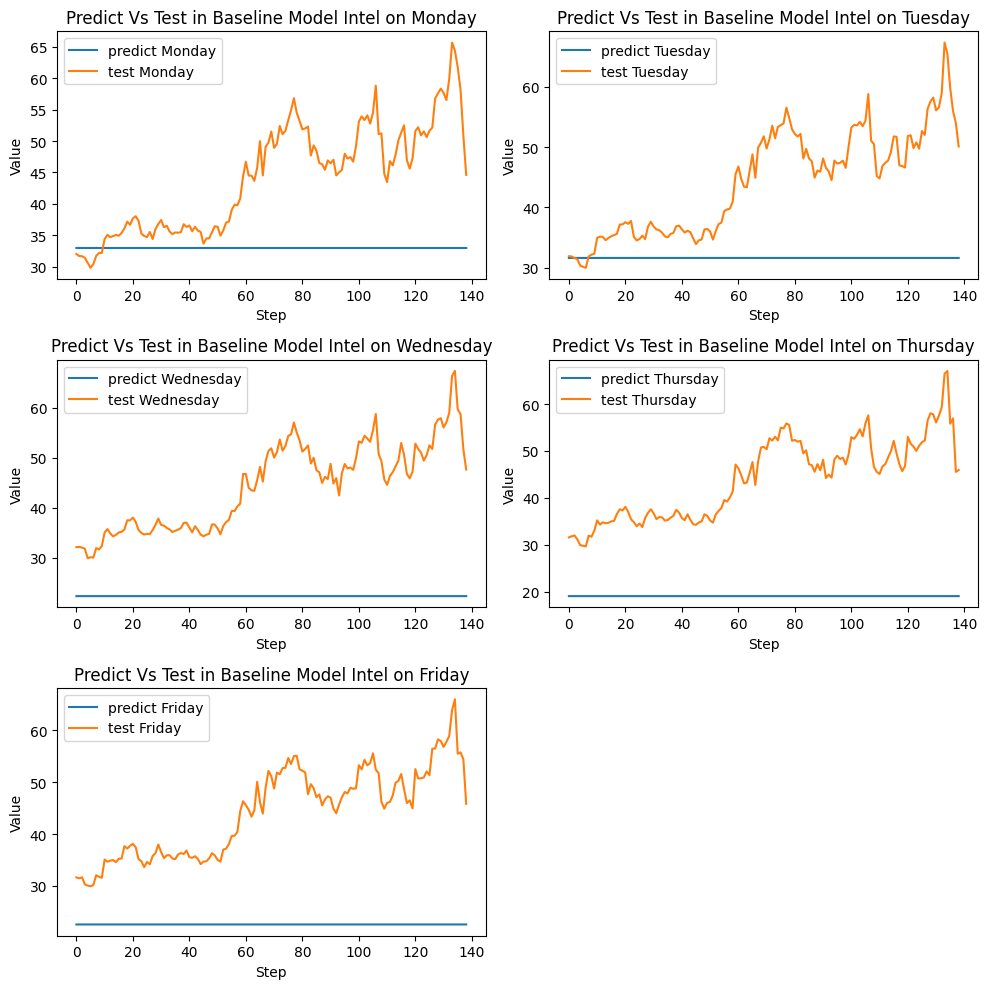

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


for i in range(5):
    ax = axs.flat[i]
    ax.plot(base_int_pred_check[:,i], label=f'predict {days[i]}')
    ax.plot(test_win_int_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Baseline Model Intel on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

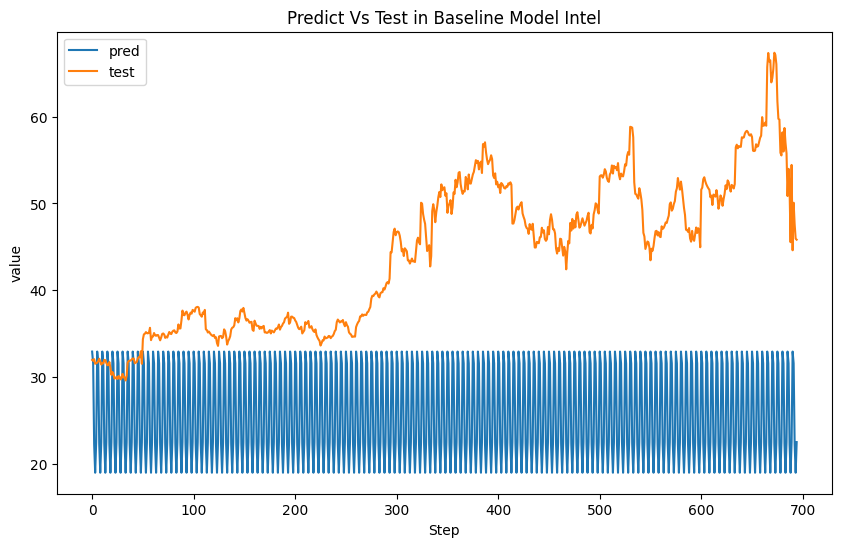

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(base_int_pred_check.flatten(), label = "pred")
plt.plot(test_win_int_check.flatten(), label = "test")
plt.title("Predict Vs Test in Baseline Model Intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [ ]:
base_int_results = evaluate_preds(y_true=test_lab_int.flatten(), y_pred=base_int_pred.flatten())
intel_model.loc[0] = ["Base",base_int_results[0],base_int_results[1],base_int_results[2]]
print("MAE :",base_int_results[0])
print("RMSE :",base_int_results[1])
print("MAPE :",base_int_results[2])

MAE : 0.24888042
RMSE : 0.28294024
MAPE : 40.060062


Pada model intel base yang dihasilkan dengan embedding menghasilkan hasil yang tidak baik pada model. Sehingga pada modified perlu diperbaiki masalah ini.

###### [LO 1, LO 2, LO 3, LO 4, 20 poin] Modifikasi arsitektur Transformer for Stocks di atas agar mendapatkan hasil klasifikasi yang optimal. Kalian dapat menambahkan atau mengurangi arsitektur tersebut dan melakukan mengubah arsitektur pada nomor 2c dengan menggunakan dropout, batch normalization dan lain-lainnya. Dan selanjutnya lakukan proses tuning hyperparameter agar unjuk kerjanya meningkat. Berikan alasan mengapa modifikasi arsitektur dan metode tuning hyperparameter kalian lebih baik.

Pada base model terdapat beberapa masalah dalam model, khususnya masalah embedding yang tidak cocok pada data univariate. Sehingga perlu di hilangkan.

Dengan begitu dapat mengulang step building model seperti di baseline, tetapi menambahkan optimizer adam untuk mempercepat model.

Selain dari embedding terdapat juga penggantian parameter yang menjadi pengaruh penting. Seperti head size, jumlah head, hidden layer, dropoout setelah tranformer block.

In [ ]:
def transformer_encoder1(inputs, head_size, num_heads, ff_dim, dropout=0):

    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    return x + res

In [ ]:
def build_model1(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        x = transformer_encoder1(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model1_goo = build_model1(
    input_shape,
    head_size=35,
    num_heads=75,
    ff_dim=256,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.3,
    dropout=0.15,
)

model1_goo.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

model1_goo.fit(
    train_win_goo,
    train_lab_goo,
    validation_data=(val_win_goo, val_lab_goo),
    epochs=40,
    batch_size=32
)

Epoch 1/40
14/14 [==============================] - 20s 113ms/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.4304 - val_mean_squared_error: 0.4304
Epoch 2/40
14/14 [==============================] - 0s 32ms/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.3690 - val_mean_squared_error: 0.3690
Epoch 3/40
14/14 [==============================] - 0s 30ms/step - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.2794 - val_mean_squared_error: 0.2794
Epoch 4/40
14/14 [==============================] - 0s 30ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.2284 - val_mean_squared_error: 0.2284
Epoch 5/40
14/14 [==============================] - 0s 31ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.2028 - val_mean_squared_error: 0.2028
Epoch 6/40
14/14 [==============================] - 0s 31ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.1806 - val_mean_squared_error: 0.1806
Epoch 7/40
14/14 [==============

In [ ]:
model1_goo_pred = model1_goo.predict(test_win_goo)
model1_goo_pred_check = scaler.inverse_transform(model1_goo_pred)

2/2 [==============================] - 1s 59ms/step


In [ ]:
model1_goo_results = evaluate_preds(y_true=test_lab_goo.flatten(), y_pred=model1_goo_pred.flatten())
google_model.loc[1] = ["Parameter",model1_goo_results[0],model1_goo_results[1],model1_goo_results[2]]
print("MAE :",model1_goo_results[0])
print("RMSE :",model1_goo_results[1])
print("MAPE :",model1_goo_results[2])

MAE : 0.17486672
RMSE : 0.17982869
MAPE : 22.415958


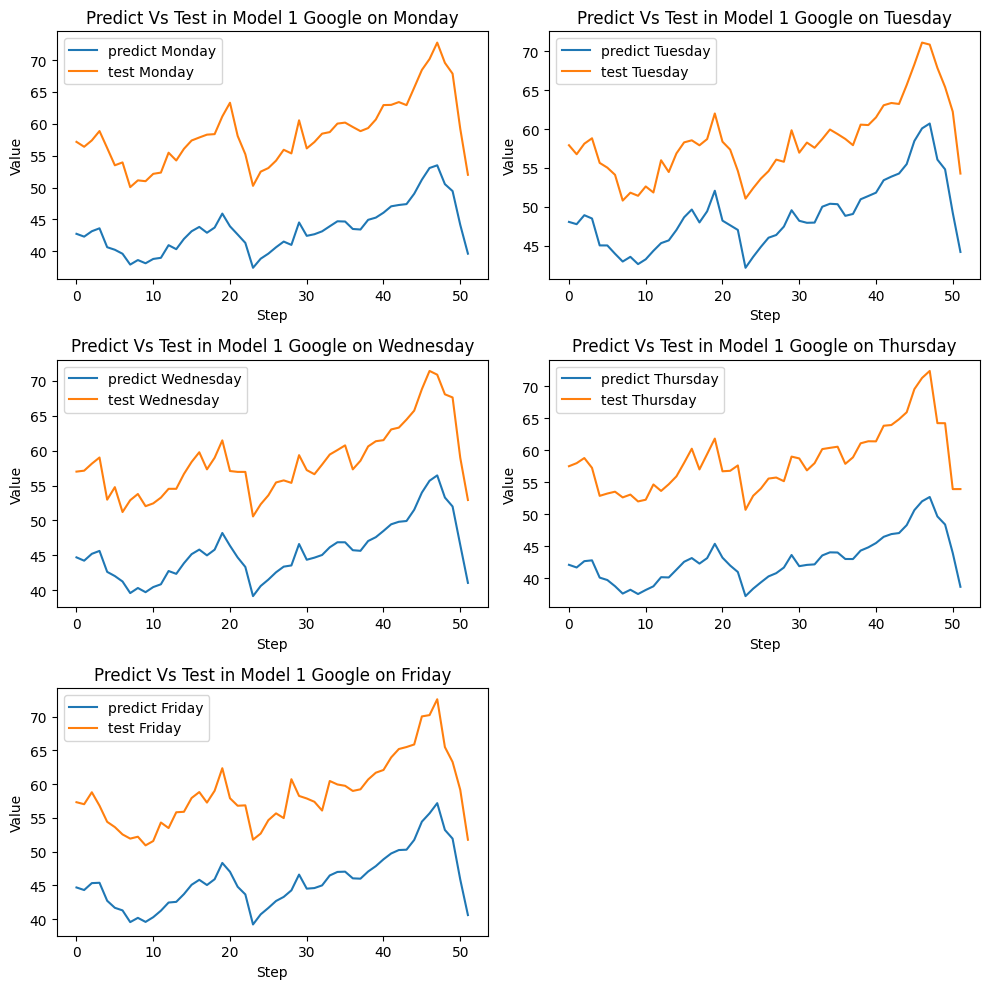

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i in range(5):
    ax = axs.flat[i]
    ax.plot(model1_goo_pred_check[:, i], label=f'predict {days[i]}')
    ax.plot(test_win_goo_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Model 1 Google on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

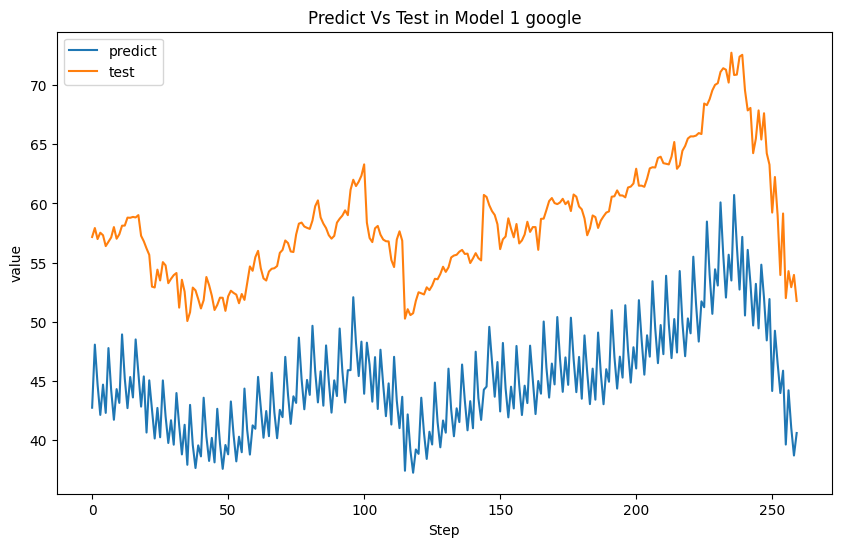

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model1_goo_pred_check.flatten(), label='predict')
plt.plot(test_win_goo_check.flatten(),label='test')
plt.title("Predict Vs Test in Model 1 google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [ ]:
model1_int = build_model1(
    input_shape,
    head_size=46,
    num_heads=60,
    ff_dim=55,
    num_transformer_blocks=5,
    mlp_units=[256],
)

model1_int.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

model1_int.fit(
    train_win_int,
    train_lab_int,
    validation_data=(val_win_int, val_lab_int),
    epochs=40,
    batch_size=32
)

Epoch 1/40
37/37 [==============================] - 18s 35ms/step - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0661 - val_mean_squared_error: 0.0661
Epoch 2/40
37/37 [==============================] - 1s 19ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 3/40
37/37 [==============================] - 1s 20ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 4/40
37/37 [==============================] - 1s 19ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 5/40
37/37 [==============================] - 1s 20ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 6/40
37/37 [==============================] - 1s 19ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 7/40
37/37 [===============

In [ ]:
model1_int_pred = model1_int.predict(test_win_int)
model1_int_pred_check = scaler.inverse_transform(model1_int_pred)

5/5 [==============================] - 0s 19ms/step


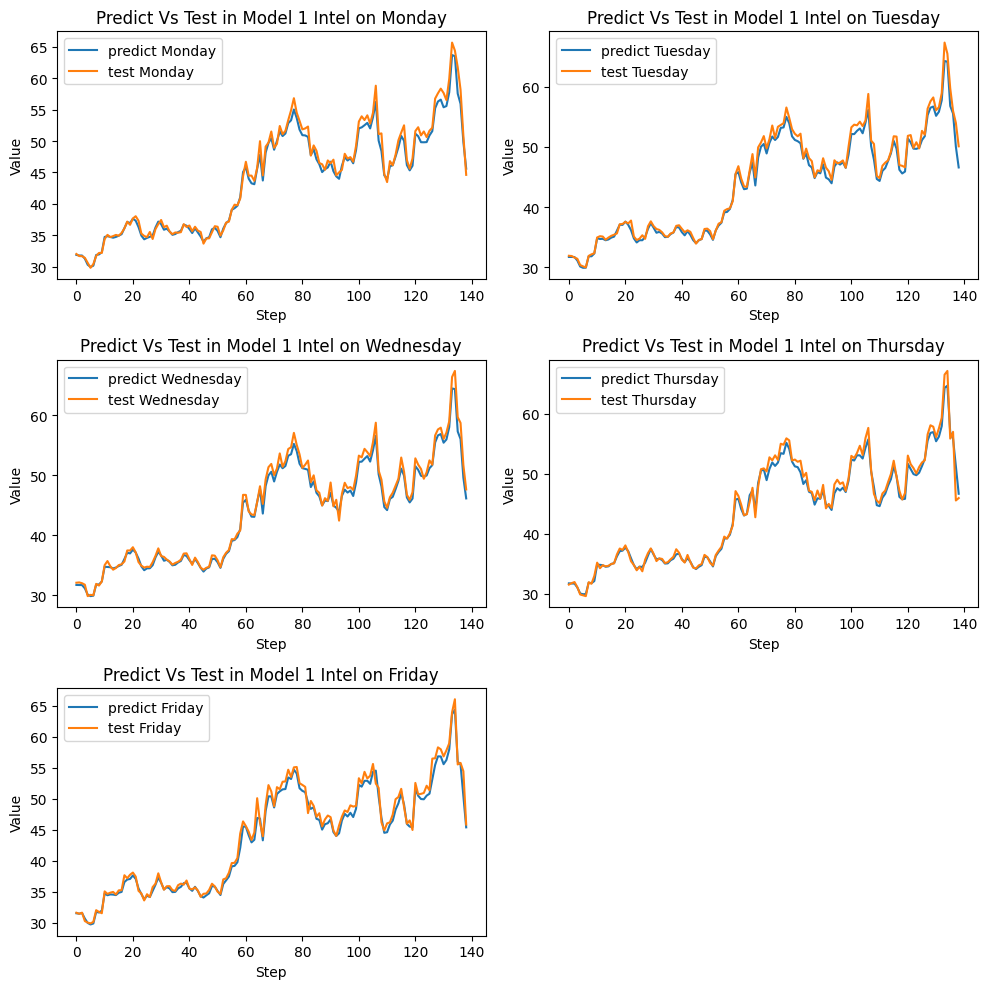

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i in range(5):
    ax = axs.flat[i]
    ax.plot(model1_int_pred_check[:, i], label=f'predict {days[i]}')
    ax.plot(test_win_int_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Model 1 Intel on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()


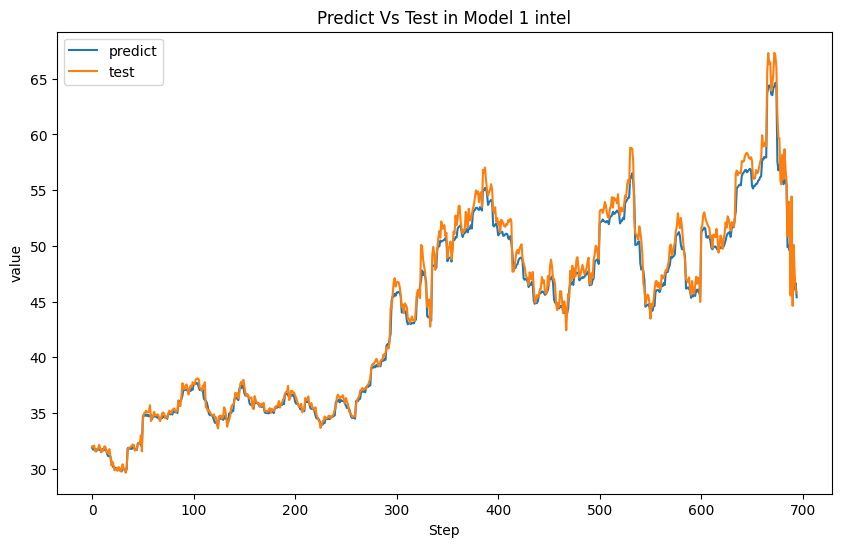

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model1_int_pred_check.flatten(), label='predict')
plt.plot(test_win_int_check.flatten(),label='test')
plt.title("Predict Vs Test in Model 1 intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [ ]:
model1_int_results = evaluate_preds(y_true=test_lab_int.flatten(), y_pred=model1_int_pred.flatten())
intel_model.loc[1] = ["Paramater",model1_int_results[0],model1_int_results[1],model1_int_results[2]]
print("MAE :",model1_int_results[0])
print("RMSE :",model1_int_results[1])
print("MAPE :",model1_int_results[2])

MAE : 0.017313467
RMSE : 0.024075076
MAPE : 2.7895958


> Dari hasil yang diberikan terdapat beberapa hal yang dapat disimpulkan pada model google khususnya pada predict dari model mengalami offset sangat jauh dari test yang diberikan. Maka dari itu salah satu cara untuk mengatasi hal ini adalah menambahkan convulsion layer di dalam tranformers block.

> Sedangkan untuk model intel sendiri offset yang diberikan antara predicted dengan test tidaklah cukup jauh. Tetapi untuk menambahkan akurasi dari model (mengurangi MAPE) akan diperlakukan cara yang sama seperti google

Pada tahapan ini parameter akan sama seperti model 1 tidak ada yang diubah hanya penambahan layer convulsion

In [ ]:
def transformer_encoder_2(inputs, head_size, num_heads, ff_dim, dropout=0):

    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def model2(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        x = transformer_encoder_2(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="linear")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model2_goo = model2(
    input_shape,
    head_size=35,
    num_heads=75,
    ff_dim=256,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.3,
    dropout=0.15,
)

model2_goo.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

model2_goo.fit(
    train_win_goo,
    train_lab_goo,
    validation_data=(val_win_goo, val_lab_goo),
    epochs=40,
    batch_size=32
)

Epoch 1/40
14/14 [==============================] - 18s 77ms/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.3723 - val_mean_squared_error: 0.3723
Epoch 2/40
14/14 [==============================] - 0s 27ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.2624 - val_mean_squared_error: 0.2624
Epoch 3/40
14/14 [==============================] - 0s 27ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.1742 - val_mean_squared_error: 0.1742
Epoch 4/40
14/14 [==============================] - 0s 28ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.1189 - val_mean_squared_error: 0.1189
Epoch 5/40
14/14 [==============================] - 0s 29ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0847 - val_mean_squared_error: 0.0847
Epoch 6/40
14/14 [==============================] - 0s 27ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 7/40
14/14 [===============

In [ ]:
model2_goo_pred = model2_goo.predict(test_win_goo)
model2_goo_pred_check = scaler.inverse_transform(model2_goo_pred)

2/2 [==============================] - 1s 36ms/step


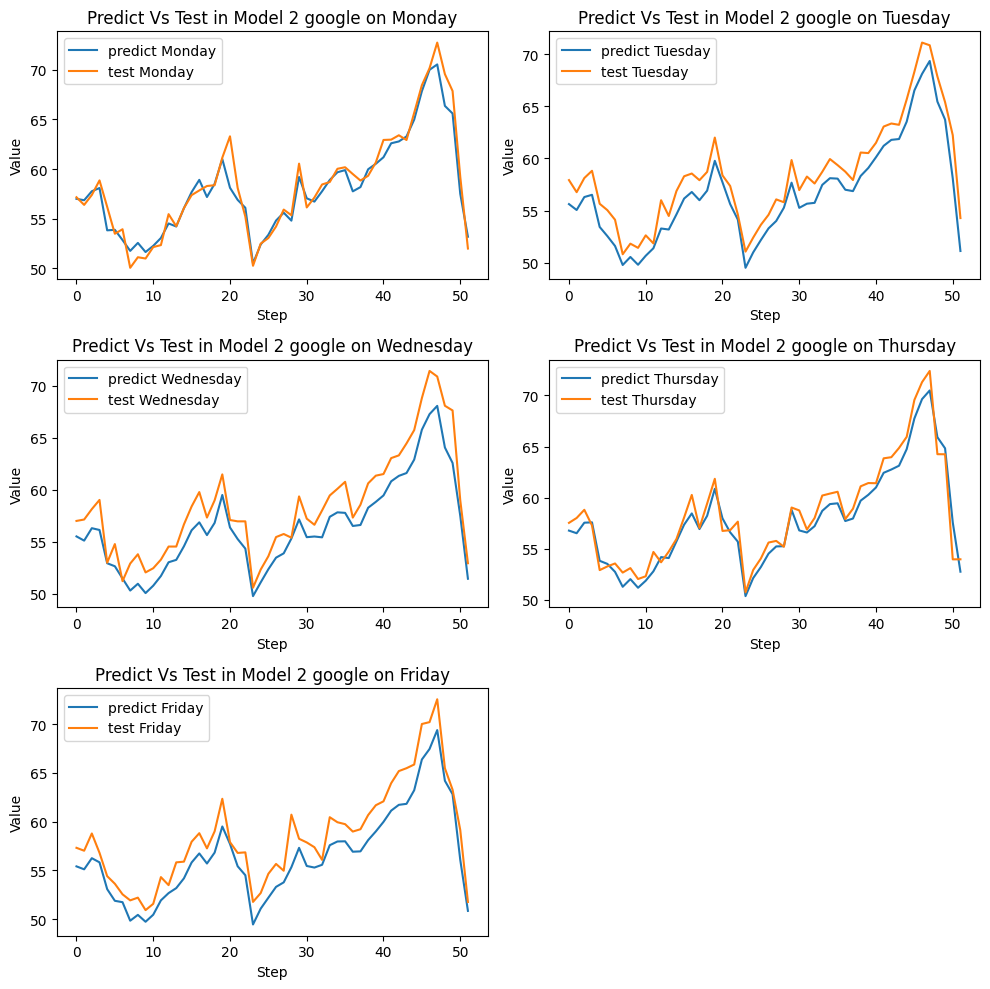

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i in range(5):
    ax = axs.flat[i]
    ax.plot(model2_goo_pred_check[:, i], label=f'predict {days[i]}')
    ax.plot(test_win_goo_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Model 2 google on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

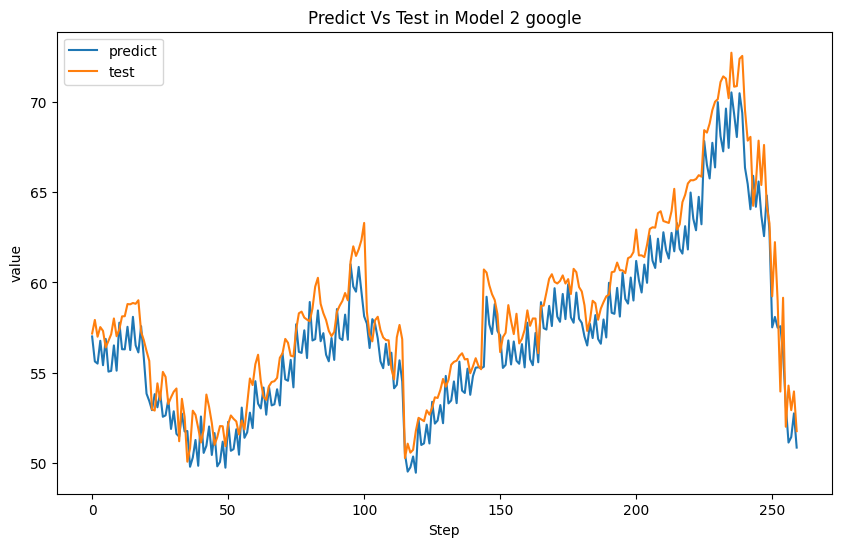

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model2_goo_pred_check.flatten(), label='predict')
plt.plot(test_win_goo_check.flatten(),label='test')
plt.title("Predict Vs Test in Model 2 google")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [ ]:
model2_goo_results = evaluate_preds(y_true=test_lab_goo.flatten(), y_pred=model2_goo_pred.flatten())
google_model.loc[2] = ["Conv",model2_goo_results[0],model2_goo_results[1],model2_goo_results[2]]
print("MAE :",model2_goo_results[0])
print("RMSE :",model2_goo_results[1])
print("MAPE :",model2_goo_results[2])

MAE : 0.028406017
RMSE : 0.034612
MAPE : 3.6062129


In [ ]:
model2_int = model2(
    input_shape,
    head_size=35,
    num_heads=75,
    ff_dim=256,
    num_transformer_blocks=5,
    mlp_units=[256],
    mlp_dropout=0.3,
    dropout=0.15,
)

model2_int.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)

model2_int.fit(
    train_win_int,
    train_lab_int,
    validation_data=(val_win_int, val_lab_int),
    epochs=40,
    batch_size=32
)

Epoch 1/40
37/37 [==============================] - 19s 38ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 2/40
37/37 [==============================] - 1s 23ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 3/40
37/37 [==============================] - 1s 22ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/40
37/37 [==============================] - 1s 21ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/40
37/37 [==============================] - 1s 21ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/40
37/37 [==============================] - 1s 32ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/40
37/37 [===============

In [ ]:
model2_int_pred = model2_int.predict(test_win_int)
model2_int_pred_check = scaler.inverse_transform(model2_int_pred)

5/5 [==============================] - 1s 20ms/step


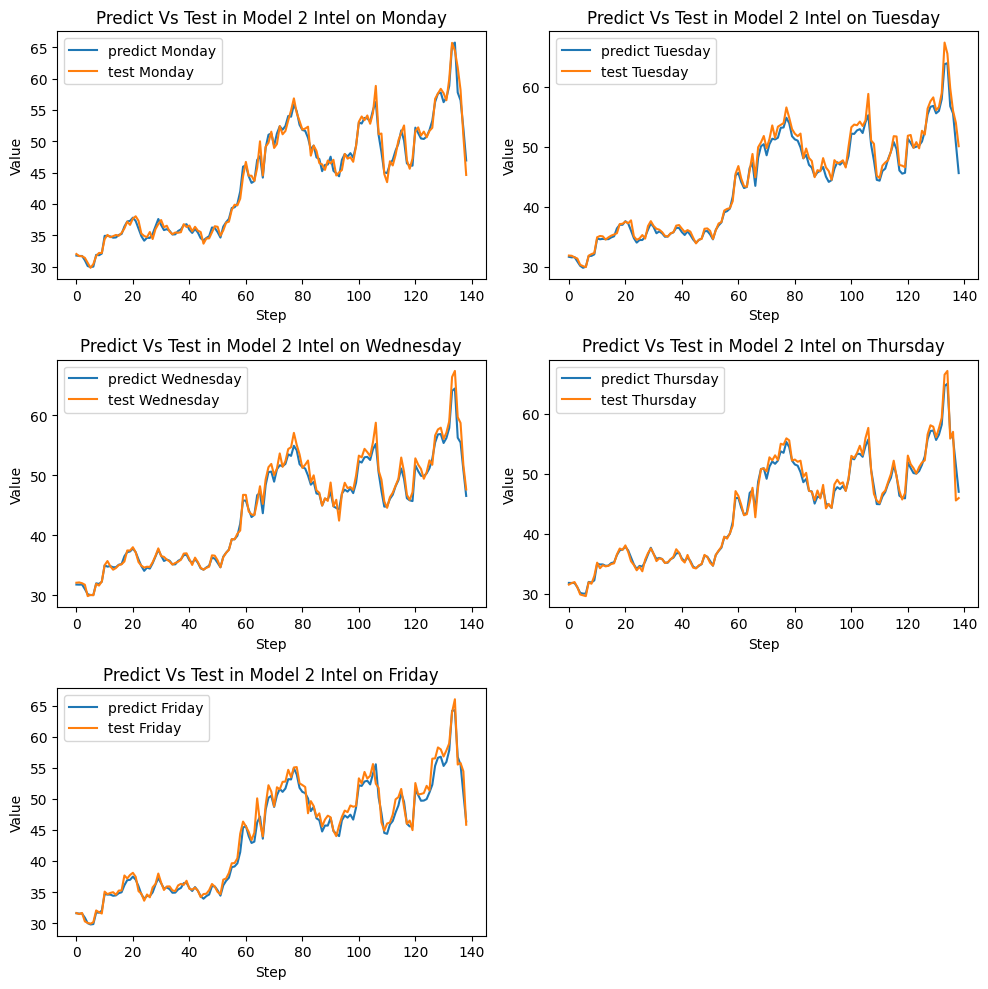

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i in range(5):
    ax = axs.flat[i]
    ax.plot(model2_int_pred_check[:, i], label=f'predict {days[i]}')
    ax.plot(test_win_int_check[:, i], label=f'test {days[i]}')
    ax.set_title(f"Predict Vs Test in Model 2 Intel on {days[i]}")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()
for j in range(5, 6):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

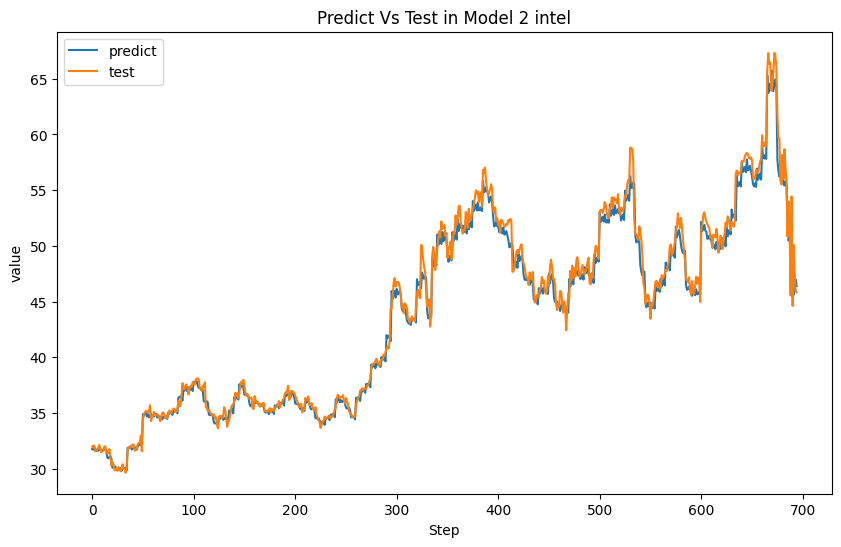

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model2_int_pred_check.flatten(), label='predict')
plt.plot(test_win_int_check.flatten(),label='test')
plt.title("Predict Vs Test in Model 2 intel")
plt.xlabel("Step")
plt.ylabel("value")
plt.legend()
plt.show()

In [ ]:
model2_int_results = evaluate_preds(y_true=test_lab_int.flatten(), y_pred=model2_int_pred.flatten())
intel_model.loc[2] = ["Conv",model2_int_results[0],model2_int_results[1],model2_int_results[2]]
print("MAE :",model2_int_results[0])
print("RMSE :",model2_int_results[1])
print("MAPE :",model2_int_results[2])

MAE : 0.01600866
RMSE : 0.022798454
MAPE : 2.589915


Dari percobaan kedua didapatkan hasil yang cukup memuaskan dibandingkan model. Pada model googe error yang diberikan 3 persen yang mana cukup kecil dibandingkan dari model kedua. Sedangkan untuk model pada intel untuk errornya mengurang dan berada di 2 persen. Walaupun tidak sebanyak seperti google

###### [LO 3, LO 4, 5 poin] Evaluasi performa dari arsitektur nomor 2d secara rinci dan jelaskan hasil yang kalian dapatkan. Gunakan testing set yang diberikan untuk memprediksi nilai ground truth dengan predicted result.

In [ ]:
label = ["Base","model_1(parameter)","model_2(Conv)"]

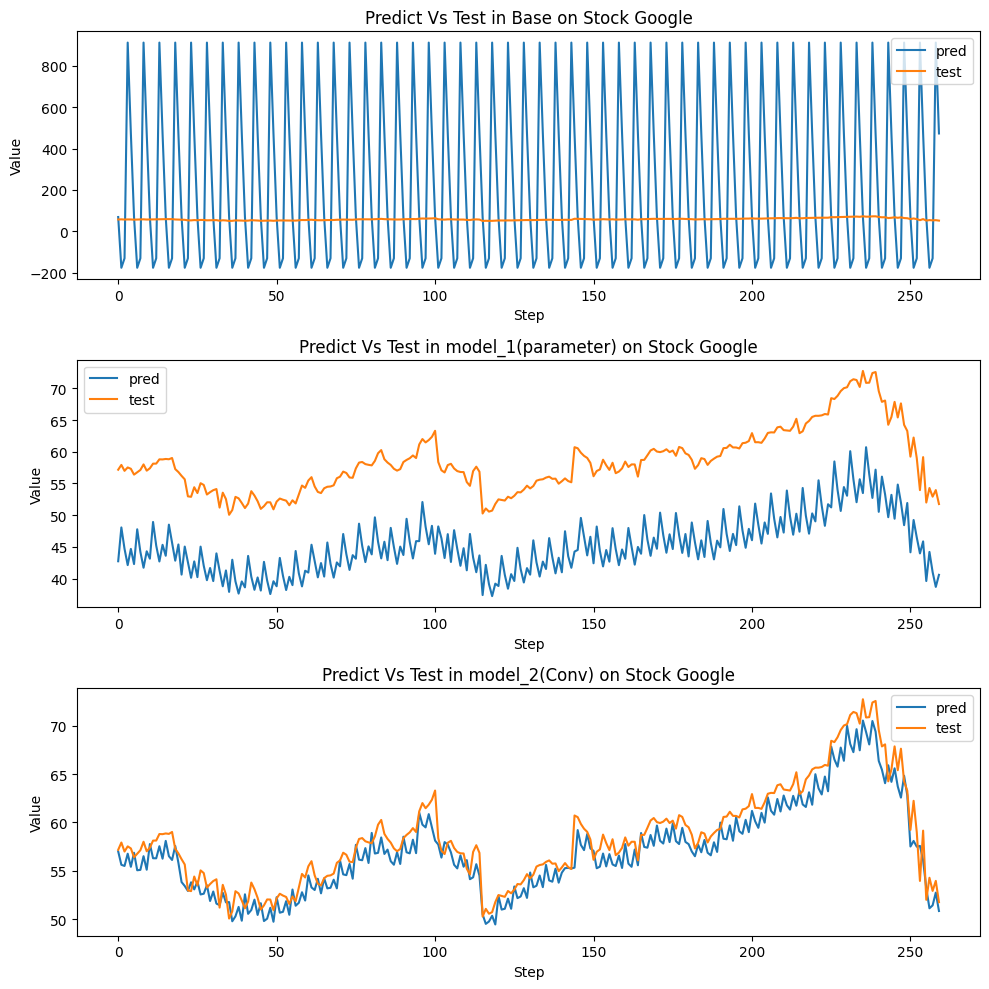

In [ ]:
google_array = [base_goo_pred_check.flatten(),model1_goo_pred_check.flatten(),model2_goo_pred_check.flatten()]
fig, axs = plt.subplots(3, 1, figsize=(10, 10))


for i in range(3):
    ax = axs.flat[i]
    ax.plot(google_array[i],label="pred")
    ax.plot(test_win_goo_check.flatten(),label="test")
    ax.set_title(f"Predict Vs Test in {label[i]} on Stock Google")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()

plt.show()


In [ ]:
google_model

,Model,MAE,RMSE,MAPE
0,Base,4.566708,5.971919,591.510315
1,Parameter,0.174867,0.179829,22.415958
2,Conv,0.028406,0.034612,3.606213


Dari model yang didapatkan :
- Pada base model, arsitektur yang digunakan kurang cocok untuk time series data yang bertipe univariate, hal ini dikarenakan terdapat fitur embedding yang akan melakukan representasi dari fitur-fitur data, tetapi didalam univariate data hanya terdapat 1 fitur. Selain itu arsitektur dari baseline terlalu kompleks yang membuat model tidak baik.

- Pada model 1 parameter dari base diganti beberapa untuk menaikan performa model. parameter yang diganti adalah head_size, number head, feed forward dimesion, dan dropout setelah transformer block.

- Pada model 2 penabahakan convulsion layer yang mana unit akan berisi sesuai input. Dengan cara ini menaikan performa model, Hal ini dikarenakan MAPE dari model yang menurun. Dimana hal ini menjadi best model pada data google, dengan error 3 persen.

> 💡 Kesimpulan yang didapatkan dengan merubah arsitektur menjadi lebih sederhana dan dengan menggunakan 2 convulsion layer pada feed forward menghasilkan error model yang cukup kecil dibandingkan model 1 dan 2, yaitu 3 persen.

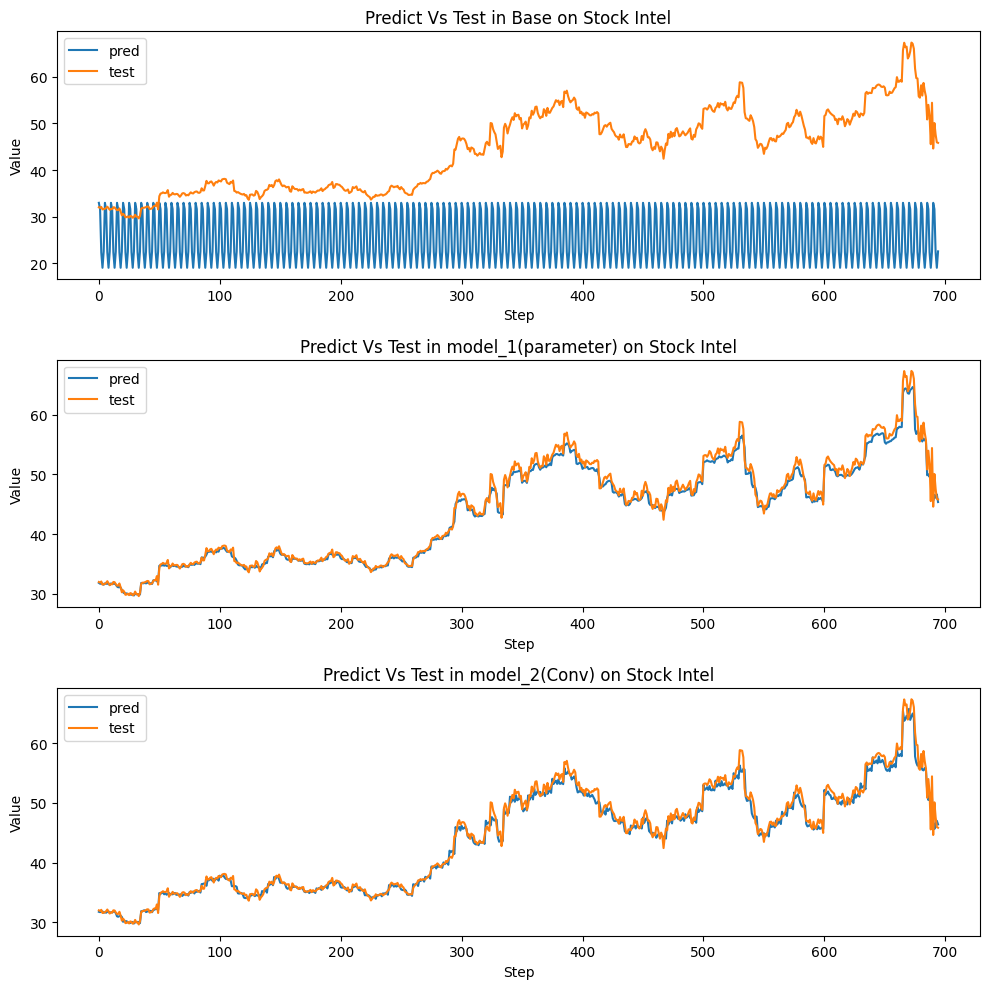

In [ ]:
intel_array = [base_int_pred_check.flatten(),model1_int_pred_check.flatten(),model2_int_pred_check.flatten()]
fig, axs = plt.subplots(3, 1, figsize=(10, 10))


for i in range(3):
    ax = axs.flat[i]
    ax.plot(intel_array[i],label="pred")
    ax.plot(test_win_int_check.flatten(),label="test")
    ax.set_title(f"Predict Vs Test in {label[i]} on Stock Intel")
    ax.set_xlabel("Step")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()

plt.show()


In [ ]:
intel_model

,Model,MAE,RMSE,MAPE
0,Base,0.248880,0.282940,40.060062
1,Paramater,0.017313,0.024075,2.789596
2,Conv,0.016009,0.022798,2.589915


Dari model yang didapatkan :
- Pada base model, arsitektur yang digunakan kurang cocok untuk time series data yang bertipe univariate, hal ini dikarenakan terdapat fitur embedding yang akan melakukan representasi dari fitur-fitur data, tetapi didalam univariate data hanya terdapat 1 fitur. Selain itu arsitektur dari baseline terlalu kompleks yang membuat model tidak baik.

- Pada model 1 parameter dari base diganti beberapa untuk menaikan performa model. parameter yang diganti adalah head_size, number head, feed forward dimesion, dan dropout setelah transformer block. Pada model ini error dari model sudah menurun sangat drastis menjadi 3 persen.

- Pada model 2 penabahakan convulsion layer yang mana unit akan berisi sesuai input. Dengan cara ini menaikan performa model, Hal ini dikarenakan MAPE dari model yang menurun. Dimana hal ini menjadi best model pada data intel, dengan error 2.7 persen.

> 💡 Kesimpulan yang didapatkan dengan merubah arsitektur menjadi lebih sederhana dan dengan menggunakan 2 convulsion layer pada feed forward menghasilkan error model yang cukup kecil dibandingkan model 1 dan 2, yaitu 2.5 persen.